In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel('data/monthly_avg.xlsx', parse_dates=['Date'], index_col='Date')
df.index = df.index.strftime('%m.%Y')
df = df.round(4)
df

,CHF,EUR,GPB,USD,AUD,UAH,NOK
Date,,,,,,,
06.2023,4.5448,4.4437,5.1751,4.0777,2.7129,0.1106,0.3779
07.2023,4.5988,4.4429,5.1749,4.0190,2.7063,0.1090,0.3913
08.2023,4.6529,4.4598,5.1946,4.0880,2.6514,0.1108,0.3908
09.2023,4.7908,4.5977,5.3353,4.3033,2.7645,0.1166,0.4013
10.2023,4.7249,4.5133,5.1986,4.2708,2.7136,0.1169,0.3886
11.2023,4.5668,4.3997,5.0545,4.0690,2.6442,0.1125,0.3729
12.2023,4.5883,4.3321,5.0269,3.9733,2.6552,0.1070,0.3758
01.2024,4.6625,4.3651,5.0839,4.0020,2.6600,0.1057,0.3849
02.2024,4.5747,4.3275,5.0646,4.0103,2.6177,0.1055,0.3800


In [9]:
## In this example investment, it is assumed that buying and selling were done at the market rate, 
## with an initial investment of 10,000 PLN.

In [10]:
returns = df.pct_change().dropna()
initial_investment = 10000
final_values = ((1 + returns).cumprod().iloc[-1])*initial_investment
investment_returns = ((final_values / initial_investment)-1) * 100
investment_risk = returns.std() * 100

investment_analysis = pd.DataFrame({
    'Final Value': final_values,
    'Return (%)': investment_returns,
    'Risk (%)': investment_risk
}).round(4)
investment_analysis

,Final Value,Return (%),Risk (%)
CHF,9885.5835,-1.1442,2.1404
EUR,9731.7551,-2.6824,1.4808
GPB,9870.9204,-1.2908,1.6118
USD,9839.3702,-1.6063,2.4855
AUD,9814.2209,-1.8578,1.8614
UAH,8969.2586,-10.3074,2.6529
NOK,10005.2924,0.0529,2.4390


In [11]:
investment_analysis.to_excel('data/investment_analysis.xlsx')

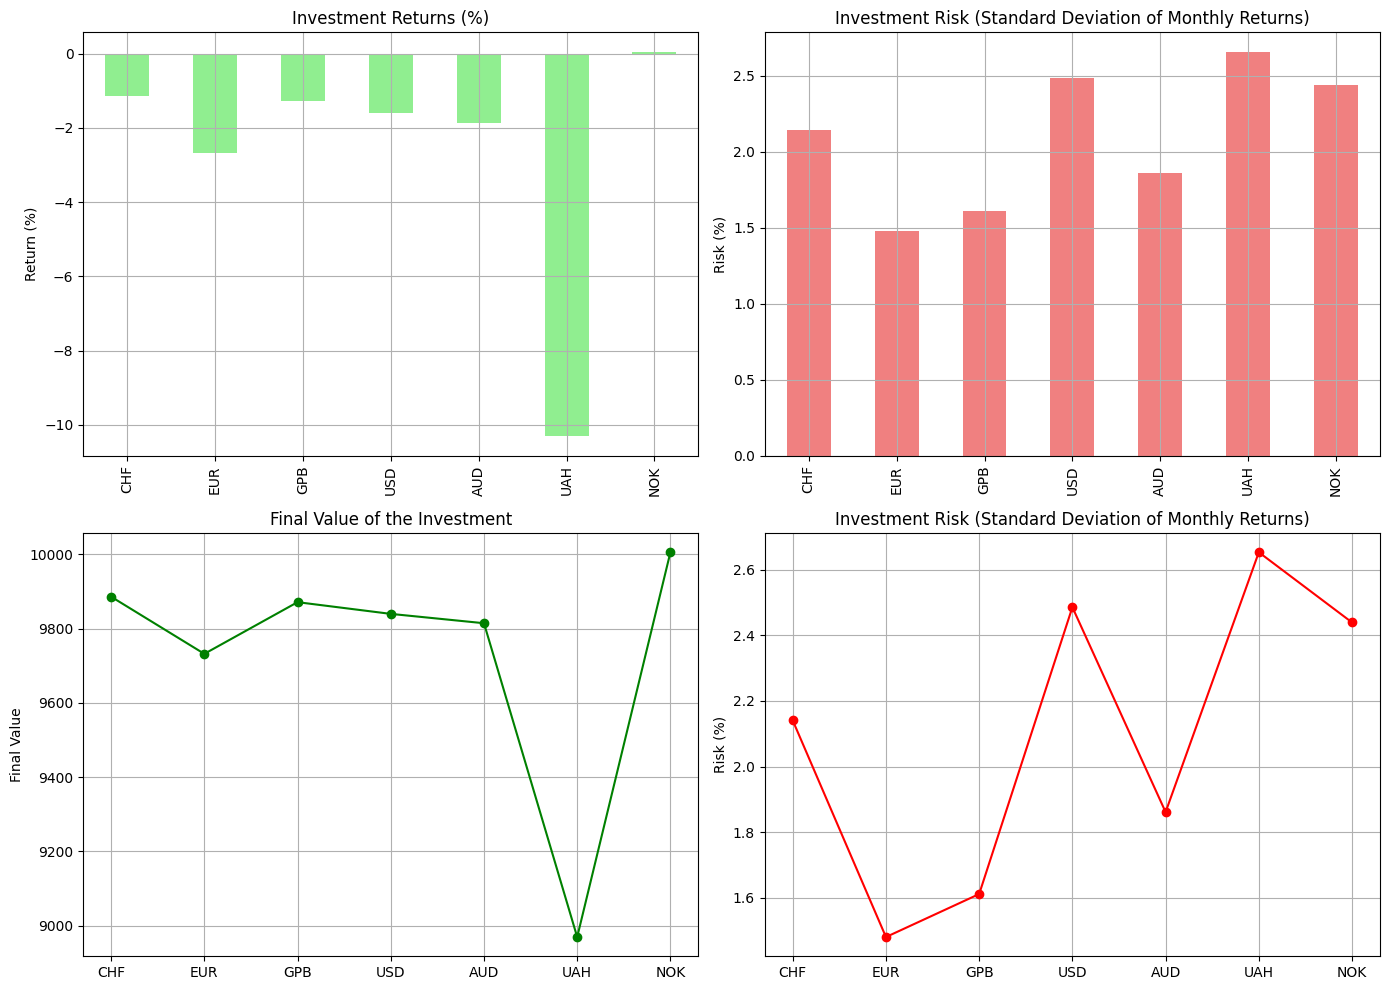

In [12]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
investment_returns.plot(kind='bar', color='lightgreen')
plt.title('Investment Returns (%)')
plt.ylabel('Return (%)')
plt.grid(True)

plt.subplot(2, 2, 2)
investment_risk.plot(kind='bar', color='lightcoral')
plt.title('Investment Risk (Standard Deviation of Monthly Returns)')
plt.ylabel('Risk (%)')
plt.grid(True)

plt.subplot(2, 2, 3) 
final_values.plot(style='-o', color='green')
plt.title('Final Value of the Investment')
plt.ylabel('Final Value')
plt.grid(True)

plt.subplot(2, 2, 4) 
investment_risk.plot(style='-o', color='red')  
plt.title('Investment Risk (Standard Deviation of Monthly Returns)')
plt.ylabel('Risk (%)')
plt.grid(True)

plt.tight_layout()
plt.savefig('data/investment_returns_and_risk.pdf')
plt.show()